### CPSC 672 Network Project

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import random
from random import sample
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import ast
from scipy import spatial
import csv
from tqdm.notebook import tqdm
%matplotlib inline

### Data

The following few cells read in our data from a excel spreadsheet and organize them into a few arrays:
- stock_symbols contains all the actual stock names
- dates contains all the column headings (which are dates) from Feb 2010 to Dec 2021

In [64]:
df_total = pd.read_excel('data/all_data.xlsx', sheet_name='percentChange')
df_subset = pd.read_excel('data/subset_data.xlsx',sheet_name='percentChange')

In [65]:
stock_symbols = []
for stock in df_total['Stock']:
    stock_symbols.append(stock)

dates = df_total.columns.values
dates = dates[2:]

### Calculating links

To get the links between any two stocks, we use cosine similarity to determine how correlated two stocks are. The formula for cosine similarity is as follows:
$$ 
x = {1 - \frac{u \cdot v}{||u|| * ||v||}  }
$$
                            
the getSimilarities() functions do just that by comparing every stock, with every other stock, for any input date (column). Note one of the functions calculates this over a 12 month period (Yearly) whereas the other function uses the total dataset.

In [100]:
def getSimilaritiesTotal(dataFrame):
    similarities = []
    for i in tqdm(range(len(dataFrame))):
        for j in range(i+1,len(dataFrame)):
            first_stock = dataFrame.iloc[i,2:]
            second_stock = dataFrame.iloc[j,2:]
            result = 1 - spatial.distance.cosine(first_stock,second_stock)
            similarities.append((stock_symbols[i], stock_symbols[j], result))
    return similarities

In [101]:
def getSimilaritiesYearly(date,dataFrame):
    similarities = []
    elems = len(dataFrame[date])
    start_col = (np.where(dates == date)[0][0]) + 2 # plus 2 is for indexing away from stock symbol & sector
    end_col = start_col + 12
    for i in tqdm(range(elems)):
        for j in range(i+1,elems):
            first_stock = dataFrame.iloc[i,start_col:end_col]
            second_stock = dataFrame.iloc[j,start_col:end_col]
            result = 1-spatial.distance.cosine(first_stock,second_stock)
            similarities.append((stock_symbols[i], stock_symbols[j], result))
    return similarities

In [102]:
def getAllYears(dataFrame):
    i = 0
    arr = []
    start_date = dates[i]
    curr_year = start_date.year
    while(curr_year < 2021):
        yearly_similarity = getSimilaritiesYearly(start_date,dataFrame)
        arr.append((start_date,yearly_similarity))
        curr_year+=1
        i+=12
        start_date = dates[i]
    return arr

### Getting the total and Yearly similarities

In [38]:
total_similarities = getSimilaritiesTotal(df_total)

  0%|          | 0/2935 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [108]:
yearly_similarites = getAllYears(df_total)

  0%|          | 0/2935 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


  0%|          | 0/2935 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


  0%|          | 0/2935 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


  0%|          | 0/2935 [00:00<?, ?it/s]

  0%|          | 0/2935 [00:00<?, ?it/s]

  0%|          | 0/2935 [00:00<?, ?it/s]

  0%|          | 0/2935 [00:00<?, ?it/s]

  0%|          | 0/2935 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


  0%|          | 0/2935 [00:00<?, ?it/s]

  0%|          | 0/2935 [00:00<?, ?it/s]

  0%|          | 0/2935 [00:00<?, ?it/s]

### Exporting
At this point all the stock symbols are exported to csv files, each year has it's own specific set of links. And there is also a csv that contains the total similarity across the entire dataset

In [104]:
def writeStocks():
    with open('data/stocks.csv','w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["ID	label"])
        for stock in stock_symbols:
            writer.writerow([str(stock_symbols.index(stock))+"\t"+stock])

In [105]:
def writeTotal(threshold):
    with open('data/links_total.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Source	Target	Weight"])
        for link in total_similarities:
            first_stock_index = str(stock_symbols.index(link[0]))
            second_stock_index = str(stock_symbols.index(link[1]))
            link_weight = link[2]
            if(abs(link_weight) > threshold):
                writer.writerow([first_stock_index+"\t"+second_stock_index+"\t"+str(link_weight)])

In [123]:
def writeYearly(yearly_calc,threshold):
    for year in yearly_calc:
        curr_year = year[0].year
        links = year[1]
        file_name = 'data/links_'+str(curr_year)+'.csv'
        with open(file_name, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Source	Target	Weight"])
            for link in links:
                first_stock_index = str(stock_symbols.index(link[0]))
                second_stock_index = str(stock_symbols.index(link[1]))
                link_weight = link[2]
                if(abs(link_weight) > threshold):
                    writer.writerow([first_stock_index+"\t"+second_stock_index+"\t"+str(link_weight)])

In [114]:
writeStocks()
writeTotal(0.5)

In [125]:
writeYearly(yearly_similarites,0.6)

### Visualizing the Data
Now that the data has been processed and exported into their own csv's , we can begin to do some visualiation and more graph theory related calculations.
Also, due to lack of computational resources, we have decided to reduce the number of links to 100,000 . The following two functions take the original csv's and take the strongest 100,000 links and save them. Links who do not make the cut are simply discarded.

In [5]:
def filterYearly(num_of_links):
    for i in range(2010,2021):
        df_link=pd.read_csv("data/links_"+str(i)+".csv",delimiter="\t")
        df_link = df_link.sort_values(by=['Weight'],key=abs,ascending=False,ignore_index=True)
        df_link[:num_of_links].to_csv("data/Filtered/links_"+str(i)+".csv",sep='\t',index=False)

In [6]:
def filterTotal(num_of_links):
        df_link=pd.read_csv("data/links_total.csv",delimiter="\t")
        df_link = df_link.sort_values(by=['Weight'],key=abs,ascending=False,ignore_index=True)
        df_link[:num_of_links].to_csv("data/Filtered/links_total.csv",sep="\t",index=False)

In [65]:
filterYearly(100000)
filterTotal(100000)


NameError: name 'filterYearly' is not defined

In [173]:
def GraphFromFileYearlyAbsWeights(year):
    df_link=pd.read_csv("data/Filtered/links_"+str(year)+".csv",delimiter="\t")
    G = nx.Graph()
    for index,row in df_link.iterrows():
        G.add_edge(row['Source'],row['Target'] , weight=abs(row['Weight']))
    return G

In [174]:
def GraphFromFileTotalAbsWeights():
    df_link=pd.read_csv("data/Filtered/links_total.csv",delimiter="\t")
    G = nx.Graph()
    for index,row in df_link.iterrows():
        G.add_edge(row['Source'],row['Target'] , weight=abs(row['Weight']))
    return G


In [175]:
Yearly_Graphs = []
for i in range(2010,2021):
    G = GraphFromFileYearlyAbsWeights(i)
    Yearly_Graphs.append(G)

In [176]:
Total_Graph = []
Total_Graph.append(GraphFromFileTotalAbsWeights())

In [187]:
def PlotGraphDegDistribution(Graph_list):
    fig = plt.figure(figsize=(6,4))
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    for i in range(len(Graph_list)):
        G = Graph_list[i]
        N = len(G)
        L = G.size()
        degrees = [G.degree(node,weight='weight') for node in G]
        kmin = min(degrees)
        kmax = max(degrees)

        # Get 10 logarithmically spaced bins between kmin and kmax
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

        # histogram the data into these bins
        density, _ = np.histogram(degrees, bins=bin_edges, density=True)


        # "x" should be midpoint (IN LOG SPACE) of each bin
        log_be = np.log10(bin_edges)
        x = 10**((log_be[1:] + log_be[:-1])/2)
        label = 2010 +i if len(Graph_list) > 1 else "total"
        plt.loglog(x, density, marker='o', label = label)


        # remove right and top boundaries because they're ugly
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

        # Show the plot
    plt.legend()
    plt.show()


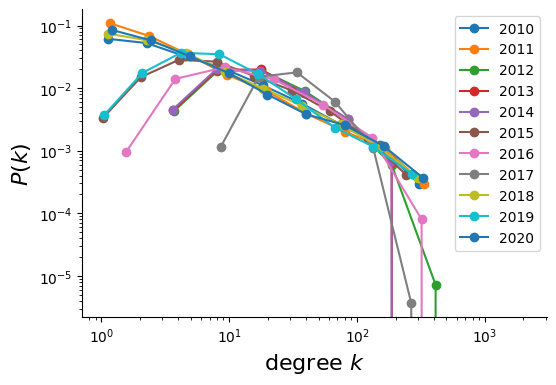

In [188]:
PlotGraphDegDistribution(Yearly_Graphs)           #for ploting total graph degree distribution
# PlotGraphDegDistribution(Total_Graph)               #for ploting total graph degree distribution